In [4]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

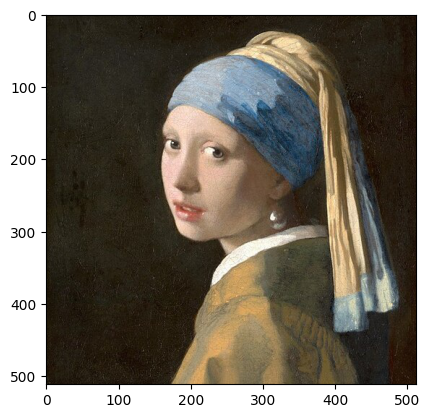

In [9]:
original_image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)
plt.imshow(original_image)

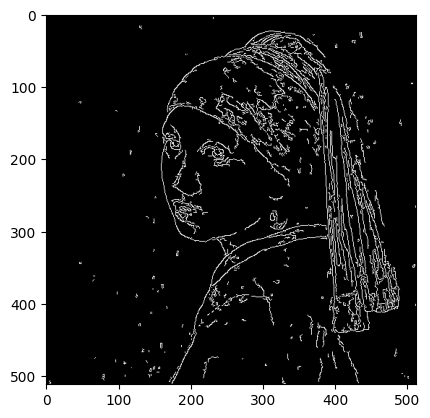

In [10]:
image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
plt.imshow(canny_image)


Next, load a ControlNet model conditioned on canny edge detection and pass it to the StableDiffusionControlNetPipeline. Use the faster UniPCMultistepScheduler and enable model offloading to speed up inference and reduce memory usage.

In [11]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

In [12]:
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

c:\Users\saqib\miniconda3\envs\pytorch_env\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\saqib\.cache\huggingface\hub\models--lllyasviel--sd-controlnet-canny. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Now pass your prompt and canny image to the pipeline:

  0%|          | 0/50 [00:00<?, ?it/s]

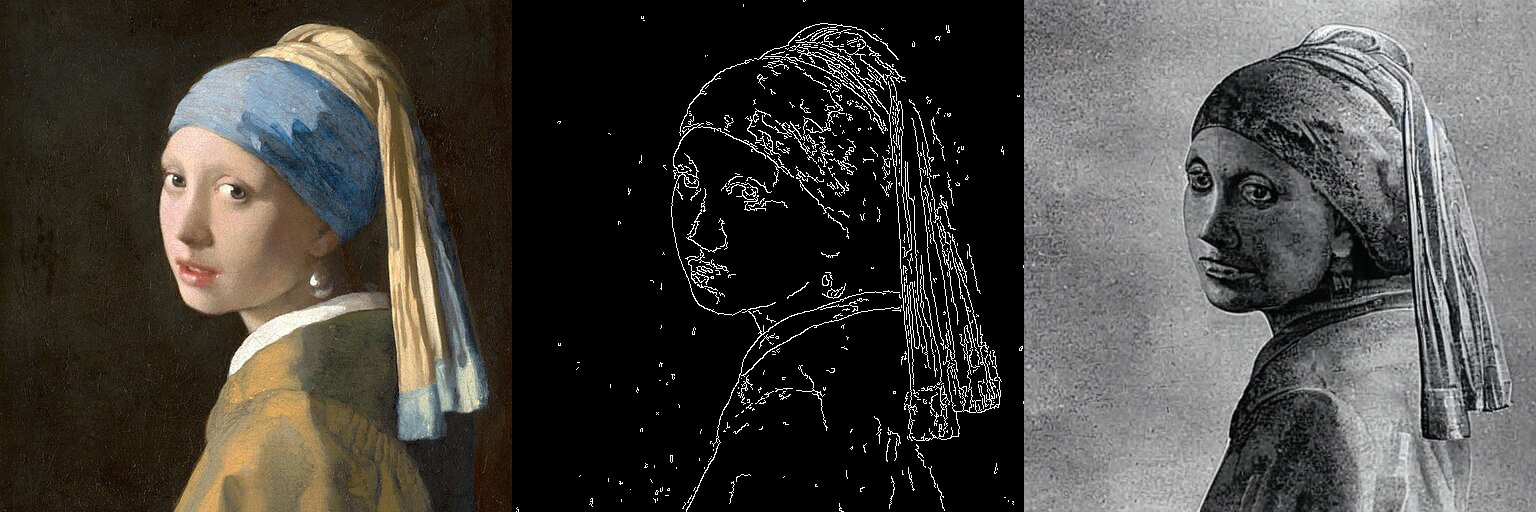

In [15]:
output = pipe(
    "the einestein", image=canny_image
).images[0]
make_image_grid([original_image, canny_image, output], rows=1, cols=3)